In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing data frame

In [2]:
df = pd.read_csv("./tvmarketing.csv") # Kaggle

In [3]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


## Reading column data into numpy arrays 

In [5]:
x = df['TV'].to_numpy()
y = df['Sales'].to_numpy()

print(x.shape)
print(y.shape)

(200,)
(200,)


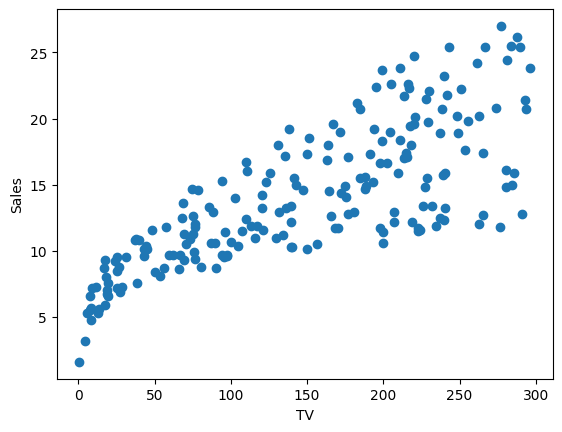

In [6]:
plt.scatter(x, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [7]:
# training dataset size
m = len(df) 

## Replicating the OLS Estimator: 
$$\hat{{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y} $$


In [8]:
# Dependent variable (1D) - X matrix
X = np.array([np.ones(m), x]) 
X = X.T # Transpose matrix to hold a shape of m x 2 to facilitate matrix multiplication of its transpose with vector y of shape m x 1 

print(X.shape)
print(X[:5]) # Check the first 5 rows of matrix X

(200, 2)
[[  1.  230.1]
 [  1.   44.5]
 [  1.   17.2]
 [  1.  151.5]
 [  1.  180.8]]


In [9]:
# Independent variable - y vector
Y = y[..., None]

print(Y.shape)
print(Y[:5]) # Check the first 5 rows of vector y

(200, 1)
[[22.1]
 [10.4]
 [ 9.3]
 [18.5]
 [12.9]]


In [10]:
# Implementing OLS Estimator
# 1D OLS parameters - [\beta_{0}, \beta_{1}], y-intercept and gradient respectively
betas = np.linalg.inv(X.T @ X) @ X.T @ Y 

betas = betas.flatten()
print(betas) # Learned coefficients/ parameters

[7.03259355 0.04753664]


# Plot linear regression function

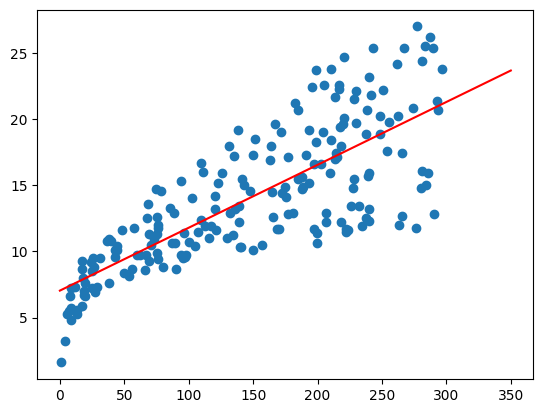

In [11]:
plt.scatter(x, y) # Original dataset

# Regression overlay
x_r = np.linspace(0,350, num=10)

# Regression function
reg_func = lambda x: betas[0] + betas[1]*x

y_r = np.array(list(map(reg_func, x_r)))

plt.plot(x_r, y_r, c='red')

plt.show()

# Compute sum of squared error

$$RSS=\sum \limits_{i=1}^{n} (y_i-f(x_i))^2$$

In [12]:
expected_y = y 
predicted_y = np.array(list(map(reg_func, x)))
temp_result = np.subtract(expected_y, predicted_y)
result = np.dot(temp_result, temp_result)

print(f'Cost: {result}')

Cost: 2102.5305831313517
